Задание 12. Градиентный спуск

In [1]:
! pip install numpy
! pip install scipy
! pip install matplotlib

In [2]:
import math
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt

Реализация градиентного спуска

In [3]:
def gradient_descent(f, n, grad, accuracy, step, step_coef = 1):
    x = np.array([ 1. ] * n)
    iterations = 0
    while True:
        x_prev = np.copy(x)
        x = x_prev - np.dot(step / step_coef, grad(x))
        step /= step_coef
        iterations += 1
        if np.linalg.norm(x - x_prev) < accuracy:
            break
    return x, iterations 

Реализация метода Нестерова

In [4]:
def nesterov(f, n, grad, accuracy):
    iterations = 1
    a = 1
    z = np.array([ 2. ] * n)
    y = np.array([ 1. ] * n)
    x = np.copy(y)
    alpha = np.linalg.norm(y - z) / np.linalg.norm(grad(y) - grad(z))
    while np.linalg.norm(grad(x)) >= accuracy:
        grad_f = grad(y)
        i = 0
        f2 = f(y - 2 ** (-i) * alpha * grad(y))
        grad_norm = np.linalg.norm(grad(y))
        while f(y) - f2 < 2 ** (-i - 1) * alpha * grad_norm ** 2:
            i += 1
        alpha = 2 ** -i * alpha
        x_prev = np.copy(x)
        x = y - alpha * grad(y)
        a_prev = a
        a = (1 + math.sqrt(4 * a_prev ** 2 + 1)) / 2
        y = x + (a_prev - 1) * (x - x_prev) / a
        iterations += 1
    return x, iterations

Тестирование градиентного спуска

f = cos(x - 1) + x^2
grad f = -sin(x - 1) + 2 * x
Тестирование метода градиентного спуска
	Точность: 1e-06
	Шаг: 0.5
	Ответ: [-0.49870113] 
	Количество итераций: 7


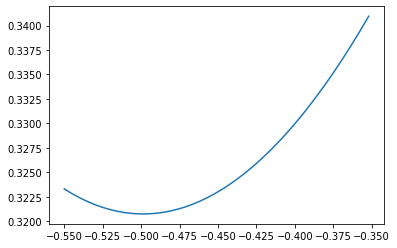

In [5]:
print("f = cos(x - 1) + x^2")
print("grad f = -sin(x - 1) + 2 * x")
f = lambda x: np.cos(x - 1) + x ** 2
grad = lambda x: -np.sin(x - 1) + 2 * x
accuracy = 1e-6
step = 0.5
print("Тестирование метода градиентного спуска")
print("\tТочность:", accuracy)
print("\tШаг:", step)
answer, iterations = gradient_descent(f, 1, grad, accuracy, step)
print("\tОтвет:", answer, "\n\tКоличество итераций:", iterations)
N = 100
h = 0.2 / N
xaxis = [-0.55 + h * i for i in range(N)]
yaxis = [f(x) for x in xaxis]
plt.plot(xaxis, yaxis)
plt.show()

Тестирование метода Нестерова

f = cos(x - 1) + x^2
grad f = -sin(x - 1) + 2 * x
Тестирование метода Нестерова
	Точность: 1e-06
	Ответ: [-0.49870107] 
	Количество итераций: 15


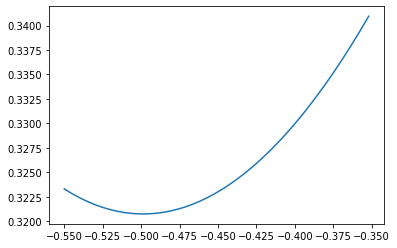

In [6]:
print("f = cos(x - 1) + x^2")
print("grad f = -sin(x - 1) + 2 * x")
f = lambda x: np.cos(x - 1) + x ** 2
grad = lambda x: -np.sin(x - 1) + 2 * x
accuracy = 1e-6
print("Тестирование метода Нестерова")
print("\tТочность:", accuracy)
answer, iterations = nesterov(f, 1, grad, accuracy)
print("\tОтвет:", answer, "\n\tКоличество итераций:", iterations)
N = 100
h = 0.2 / N
xaxis = [-0.55 + h * i for i in range(N)]
yaxis = [f(x) for x in xaxis]
plt.plot(xaxis, yaxis)
plt.show()

Сравнение количества итераций

In [7]:
print("f = x^2 + 81 * x")
print("grad f = 2 * x + 81")
f = lambda x: x ** 2 + 81 * x + 3
grad = lambda x: 2 * x + 81
accuracy = 1e-9
print("Сравнение количества итераций")
print("\tТочность:", accuracy)
_, gradient_iterations = gradient_descent(f, 1, grad, accuracy, 0.1)
print("Метод градиентного спуска (шаг = 0.1): количество итераций =", gradient_iterations)
_, gradient_iterations = gradient_descent(f, 1, grad, accuracy, 0.25)
print("Метод градиентного спуска (шаг = 0.25): количество итераций =", gradient_iterations)
_, gradient_iterations = gradient_descent(f, 1, grad, accuracy, 0.5)
print("Метод градиентного спуска (шаг = 0.5): количество итераций =", gradient_iterations)
_, nesterov_iterations = nesterov(f, 1, grad, accuracy)
print("Метод Нестерова: количество итераций =", nesterov_iterations)

f = x^2 + 81 * x
grad f = 2 * x + 81
Сравнение количества итераций
	Точность: 1e-09
Метод градиентного спуска (шаг = 0.1): количество итераций = 104
Метод градиентного спуска (шаг = 0.25): количество итераций = 36
Метод градиентного спуска (шаг = 0.5): количество итераций = 2
Метод Нестерова: количество итераций = 2
